In [1]:
import pandas as pd
df = pd.read_csv('./data/SOLUSDT_15m.csv')
df.head()

,time,open,high,low,close,volume
0,2023-06-01 00:00:00,20.810,20.910,20.769,20.889,238434.0
1,2023-06-01 00:15:00,20.890,20.965,20.869,20.950,247204.0
2,2023-06-01 00:30:00,20.950,20.971,20.744,20.803,249219.0
3,2023-06-01 00:45:00,20.802,20.803,20.719,20.781,167575.0
4,2023-06-01 01:00:00,20.783,20.863,20.777,20.826,144683.0


In [2]:
import pandas_ta as ta
df["EMA"] = ta.ema(df.close, length=50)
df["RSI"] = ta.rsi(df.close, length=3)
a=ta.adx(df.high, df.low, df.close, length=5)
df['ADX']=a['ADX_5']
df['ATR']= df.ta.atr()
#help(ta.adx)

In [4]:
#dropna
df = df.dropna()
df.head()

,time,open,high,low,close,volume,EMA,RSI,ADX,ATR
49,2023-06-01 12:15:00,20.722,20.750,20.677,20.727,216900.0,20.689580,77.276682,20.360400,0.056651
50,2023-06-01 12:30:00,20.726,20.785,20.713,20.779,158663.0,20.693087,91.191279,22.261107,0.057775
51,2023-06-01 12:45:00,20.780,20.878,20.765,20.822,243531.0,20.698142,94.993759,31.164636,0.061812
52,2023-06-01 13:00:00,20.822,20.895,20.819,20.840,273534.0,20.703705,96.061335,39.000676,0.062847
53,2023-06-01 13:15:00,20.841,20.847,20.764,20.770,133379.0,20.706305,42.808999,34.956064,0.064316


In [5]:
#set time to index

df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df.head()

C:\Users\hiban\AppData\Local\Temp\ipykernel_30764\1852176384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])


,open,high,low,close,volume,EMA,RSI,ADX,ATR
time,,,,,,,,,
2023-06-01 12:15:00,20.722,20.750,20.677,20.727,216900.0,20.689580,77.276682,20.360400,0.056651
2023-06-01 12:30:00,20.726,20.785,20.713,20.779,158663.0,20.693087,91.191279,22.261107,0.057775
2023-06-01 12:45:00,20.780,20.878,20.765,20.822,243531.0,20.698142,94.993759,31.164636,0.061812
2023-06-01 13:00:00,20.822,20.895,20.819,20.840,273534.0,20.703705,96.061335,39.000676,0.062847
2023-06-01 13:15:00,20.841,20.847,20.764,20.770,133379.0,20.706305,42.808999,34.956064,0.064316


In [6]:
from directional_change import *
from xabcd import *
from collections import Counter

ext = get_extremes(df, sigma=0.02)
patterns = find_xabcd(df,extremes=ext, err_thresh=0.5)
# patterns.keys()
# temp = patterns['Gartley']['bear_signal']
# Counter(temp)
for idx in patterns.keys():
    bull_signal = patterns[idx]['bull_signal']
    original_bull_signal_count = Counter(bull_signal)
    bear_signal = patterns[idx]['bear_signal']
    original_bear_signal_count = Counter(bear_signal)
    print(f"Pattern: {idx} , bull_signal: {original_bull_signal_count}, bear_signal: {original_bear_signal_count}")
    # put all signals together
    all_signals = bull_signal + bear_signal
    # count the number of each signal
    count = Counter(all_signals)
    print(idx, count)
    df[idx] = all_signals
    print("=====================================")

Pattern: Gartley , bull_signal: Counter({0.0: 12955, 1.0: 496}), bear_signal: Counter({0.0: 13207, -1.0: 244})
Gartley Counter({0.0: 12711, 1.0: 496, -1.0: 244})
Pattern: Bat , bull_signal: Counter({0.0: 13340, 1.0: 111}), bear_signal: Counter({0.0: 13451})
Bat Counter({0.0: 13340, 1.0: 111})
Pattern: Butterfly , bull_signal: Counter({0.0: 13376, 1.0: 75}), bear_signal: Counter({0.0: 13363, -1.0: 88})
Butterfly Counter({0.0: 13288, -1.0: 88, 1.0: 75})
Pattern: Crab , bull_signal: Counter({0.0: 13451}), bear_signal: Counter({0.0: 13449, -1.0: 2})
Crab Counter({0.0: 13449, -1.0: 2})
Pattern: Deep Crab , bull_signal: Counter({0.0: 13441, 1.0: 10}), bear_signal: Counter({0.0: 13432, -1.0: 19})
Deep Crab Counter({0.0: 13422, -1.0: 19, 1.0: 10})
Pattern: Cypher , bull_signal: Counter({0.0: 13008, 1.0: 443}), bear_signal: Counter({0.0: 13268, -1.0: 183})
Cypher Counter({0.0: 12825, 1.0: 443, -1.0: 183})
Pattern: Shark , bull_signal: Counter({0.0: 13364, 1.0: 87}), bear_signal: Counter({0.0: 1

In [7]:
#rename columns
df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

In [8]:
df['Gartley'].value_counts()

 0.0    12711
 1.0      496
-1.0      244
Name: Gartley, dtype: int64

In [9]:
from backtesting import Strategy
from backtesting import Backtest

def SIGNAL(df,col_name):
    return df[col_name]

class XABCD_Strategy(Strategy):
    pattern_type = 'Gartley' # [GARTLEY, BAT, BUTTERFLY, CRAB, DEEP_CRAB, CYPHER, SHARK]
    atr_sl_rate = 1.3
    TPSL_rate = 1.5
    trade_limit = 0
    adx_thresh = 25

    def init(self):
        super().init()
        self.signal = self.I(SIGNAL, self.data, self.pattern_type)

    def next(self):
        super().next()

        slatr = self.atr_sl_rate * self.data.ATR[-1]
        if self.signal == 1.0 and len(self.trades)<=self.trade_limit and self.data.ADX[-1] > self.adx_thresh:
            sl_price = self.data.Close[-1] - slatr
            tp_price = self.data.Close[-1] + self.TPSL_rate * slatr
            self.buy(sl=sl_price, tp=tp_price)
        if self.signal == -1.0 and len(self.trades)<=self.trade_limit and self.data.ADX[-1] > self.adx_thresh:
            sl_price = self.data.Close[-1] + slatr
            tp_price = self.data.Close[-1] - self.TPSL_rate * slatr
            self.sell(sl=sl_price, tp=tp_price)

bt = Backtest(df, XABCD_Strategy, cash=100, commission=.00002, margin=.05)
stat = bt.run()
stat

Start                     2023-06-01 12:15:00
End                       2023-10-19 14:45:00
Duration                    140 days 02:30:00
Exposure Time [%]                    6.401011
Equity Final [$]                    15.455524
Equity Peak [$]                    167.958263
Return [%]                         -84.544476
Buy & Hold Return [%]               18.063396
Return (Ann.) [%]                  -99.204171
Volatility (Ann.) [%]               99.239918
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -94.474324
Avg. Drawdown [%]                  -39.455916
Max. Drawdown Duration      110 days 22:15:00
Avg. Drawdown Duration       26 days 05:09:00
# Trades                                  112
Win Rate [%]                        41.964286
Best Trade [%]                       3.647339
Worst Trade [%]                     -2.285659
Avg. Trade [%]                    

In [10]:
%%time
stats = bt.optimize(atr_sl_rate = np.arange(0.5, 2.6, 0.2).tolist(),
                    TPSL_rate = np.arange(0.5, 2.6, 0.2).tolist(),
                    adx_thresh = np.arange(10, 40, 5).tolist(),
                    pattern_type = ['Gartley','Bat','Butterfly','Crab','Cypher','Shark'],
                    maximize='Equity Final [$]')
stats

C:\Users\hiban\AppData\Roaming\Python\Python310\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 4356 configurations.
  output = _optimize_grid()


  0%|          | 0/15 [00:00<?, ?it/s]

C:\Users\hiban\AppData\Roaming\Python\Python310\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
C:\Users\hiban\AppData\Roaming\Python\Python310\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
C:\Users\hiban\AppData\Roaming\Python\Python310\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
C

CPU times: total: 11min 6s
Wall time: 15min 39s


Start                     2023-06-01 12:15:00
End                       2023-10-19 14:45:00
Duration                    140 days 02:30:00
Exposure Time [%]                   11.575348
Equity Final [$]                  1883.313195
Equity Peak [$]                   3998.302229
Return [%]                        1783.313195
Buy & Hold Return [%]               18.063396
Return (Ann.) [%]               199578.553285
Volatility (Ann.) [%]     106865560517.908493
Sharpe Ratio                         0.000002
Sortino Ratio                       862.08988
Calmar Ratio                      2110.521398
Max. Drawdown [%]                  -94.563625
Avg. Drawdown [%]                  -19.216294
Max. Drawdown Duration       82 days 15:00:00
Avg. Drawdown Duration        3 days 02:53:00
# Trades                                   56
Win Rate [%]                        42.857143
Best Trade [%]                       8.880117
Worst Trade [%]                     -3.310305
Avg. Trade [%]                    

In [11]:
stats.keys()

Index(['Start', 'End', 'Duration', 'Exposure Time [%]', 'Equity Final [$]',
       'Equity Peak [$]', 'Return [%]', 'Buy & Hold Return [%]',
       'Return (Ann.) [%]', 'Volatility (Ann.) [%]', 'Sharpe Ratio',
       'Sortino Ratio', 'Calmar Ratio', 'Max. Drawdown [%]',
       'Avg. Drawdown [%]', 'Max. Drawdown Duration', 'Avg. Drawdown Duration',
       '# Trades', 'Win Rate [%]', 'Best Trade [%]', 'Worst Trade [%]',
       'Avg. Trade [%]', 'Max. Trade Duration', 'Avg. Trade Duration',
       'Profit Factor', 'Expectancy [%]', 'SQN', '_strategy', '_equity_curve',
       '_trades'],
      dtype='object')

In [12]:
stats._strategy

<Strategy XABCD_Strategy(atr_sl_rate=1.8999999999999997,TPSL_rate=2.4999999999999996,adx_thresh=30,pattern_type=Gartley)>

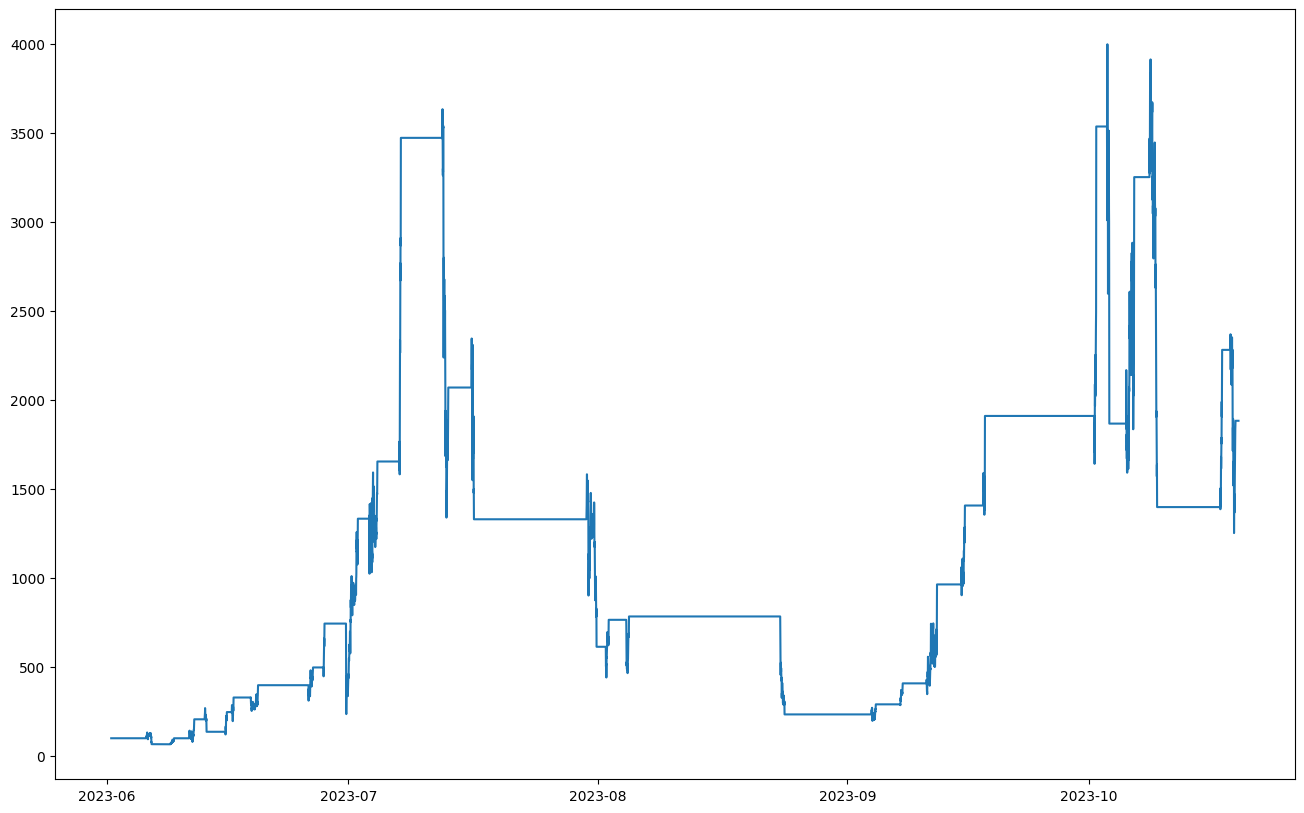

In [13]:
import matplotlib.pyplot as plt

#stats['_equity_curve']
plt.figure(figsize=(16, 10))
plt.plot(stats['_equity_curve']['Equity'])
plt.show()

In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(x=stats['_equity_curve'].index, y=stats['_equity_curve']['Equity'])])
fig.show()

In [15]:
#heatmap plotly

import plotly.express as px
import plotly.graph_objects as go

#trades
fig = go.Figure(data=go.Heatmap(
                     z=stats['_trades']['PnL'],
                     x=stats['_trades']['EntryTime'],
                     y=stats['_trades']['EntryPrice'],
                     hoverongaps = False))
fig.show()